# Importing Necessary Libraries and Dataset:

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
df= pd.read_csv('/content/drive/MyDrive/Data Science Projects/Financial Fraud Detection/financial.csv')

In [ ]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


# Checking for any Missing Values:

In [ ]:
df.isnull().sum()

type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

# Dropping Unnecessary Columns:

In [3]:
columns_to_drop = ['step','nameOrig', 'nameDest']
df = df.drop(columns= columns_to_drop)
df

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,0
3,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,0
4,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1,0


# Descriptive Statistics of each Numerical Column:

*** Note:*** For Financial Fraud detection problems, i do not want to remove the outliers as they might be the potential Frauds.

In [ ]:
df.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


# Data Visualizations for Insights:

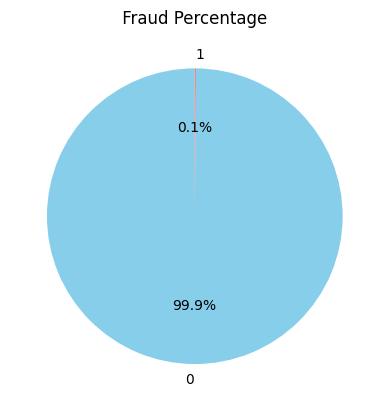

In [ ]:
# Pie Chart Showing Fraud Percentage:

# Count the occurrences of 1s and 0s in the column
value_counts = df['isFraud'].value_counts()

# Create a pie chart
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])

# Add a title
plt.title(' Fraud Percentage ')

# Display the pie chart
plt.show()

<ipython-input-9-0273f1655fd6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


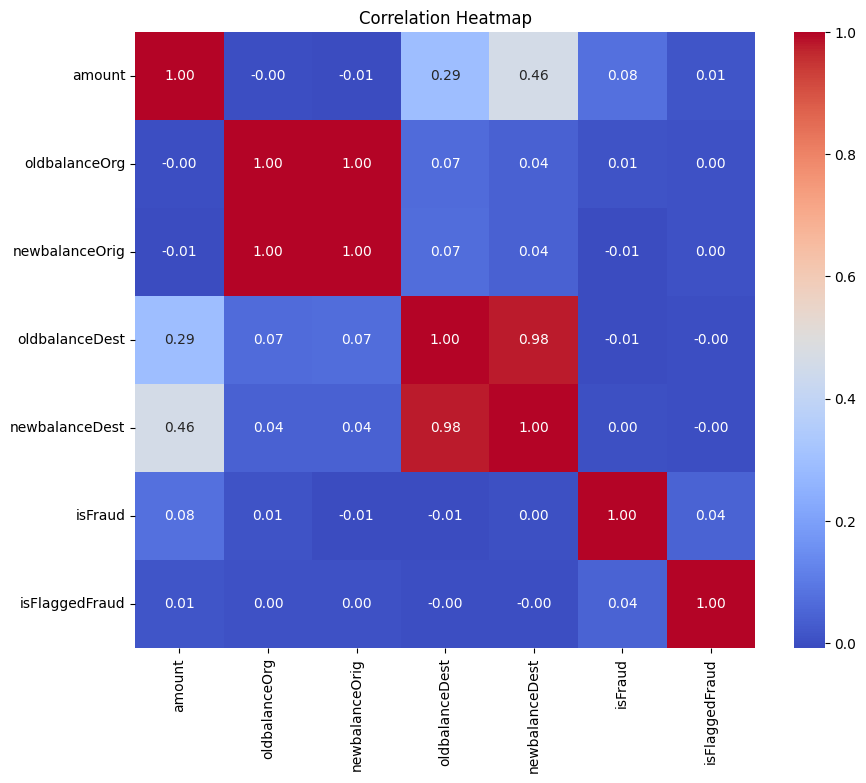

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='oldbalanceOrg', ylabel='newbalanceOrig'>

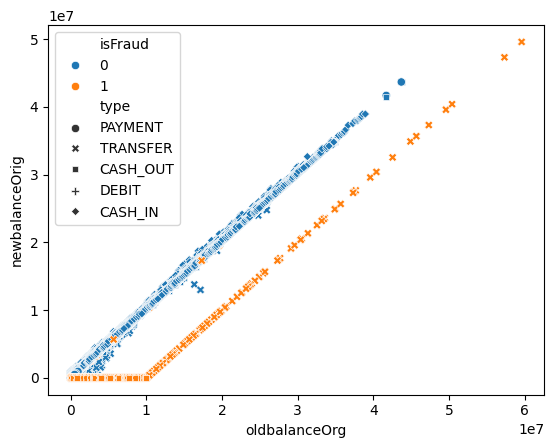

In [ ]:
# scatterplot of both Old and New Balance of Origin and Destination:

sns.scatterplot(x =df['oldbalanceOrg'], y=df['newbalanceOrig'], hue=df['isFraud'], style=df['type'])

<Axes: xlabel='oldbalanceOrg', ylabel='oldbalanceDest'>

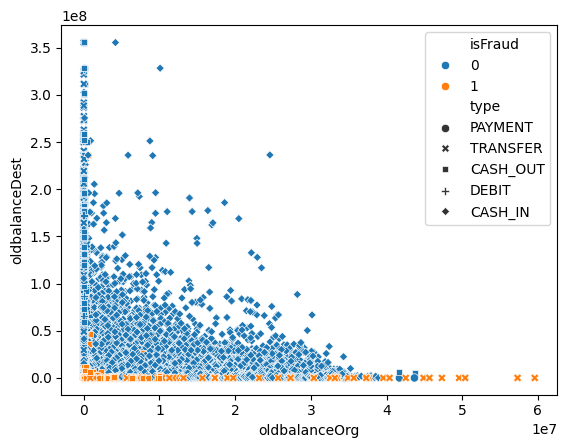

In [ ]:
sns.scatterplot(x =df['oldbalanceOrg'], y=df['oldbalanceDest'], hue=df['isFraud'], style=df['type'])

<Axes: xlabel='oldbalanceOrg', ylabel='newbalanceDest'>

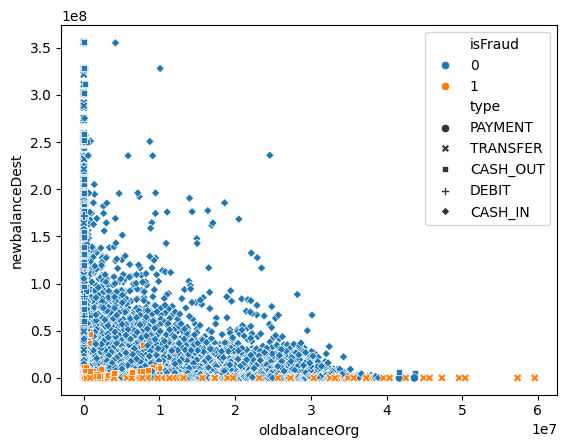

In [ ]:
sns.scatterplot(x =df['oldbalanceOrg'], y=df['newbalanceDest'], hue=df['isFraud'], style=df['type'])

<Axes: xlabel='newbalanceOrig', ylabel='oldbalanceDest'>

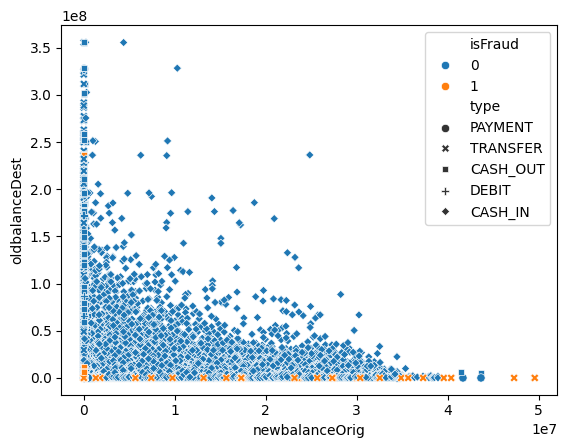

In [ ]:
sns.scatterplot(x =df['newbalanceOrig'], y=df['oldbalanceDest'], hue=df['isFraud'], style=df['type'])

<Axes: xlabel='newbalanceOrig', ylabel='newbalanceDest'>

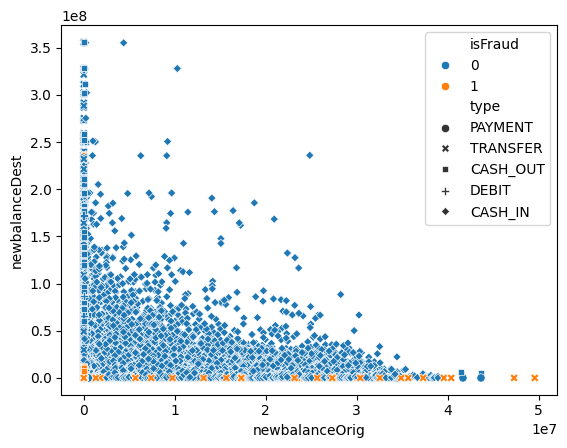

In [ ]:
sns.scatterplot(x =df['newbalanceOrig'], y=df['newbalanceDest'], hue=df['isFraud'], style=df['type'])

<Axes: xlabel='oldbalanceDest', ylabel='newbalanceDest'>

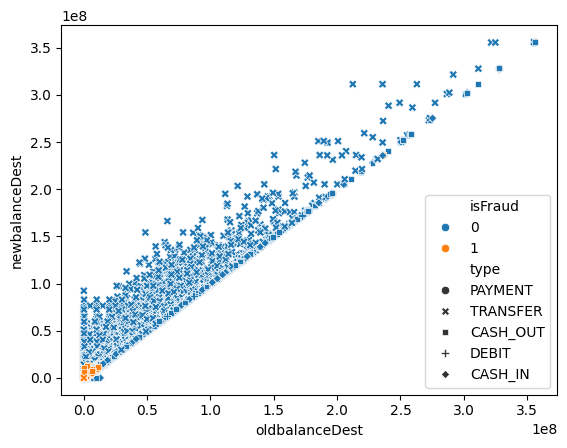

In [ ]:
sns.scatterplot(x =df['oldbalanceDest'], y=df['newbalanceDest'], hue=df['isFraud'], style=df['type'])

<Axes: xlabel='type', ylabel='amount'>

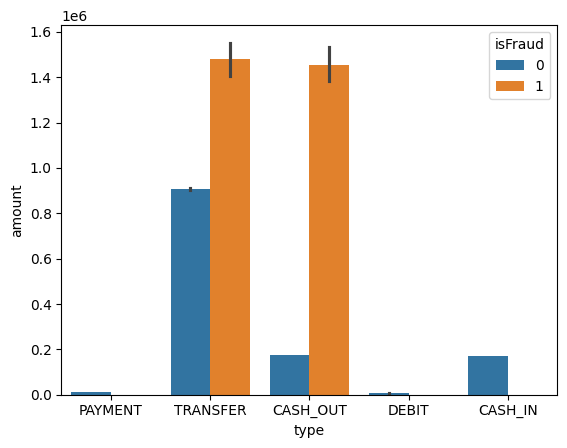

In [ ]:
# Bar Charts:
sns.barplot(x='type', y ='amount',data = df, hue='isFraud')


<Axes: xlabel='type', ylabel='oldbalanceOrg'>

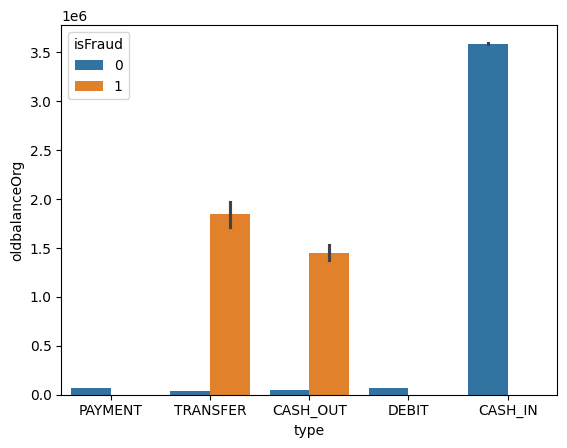

In [ ]:
sns.barplot(x='type', y ='oldbalanceOrg',data = df, hue='isFraud')


<Axes: xlabel='type', ylabel='newbalanceOrig'>

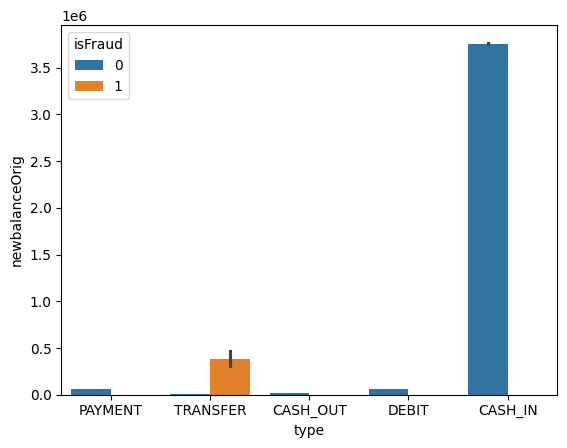

In [ ]:
sns.barplot(x='type', y ='newbalanceOrig',data = df, hue='isFraud')


<Axes: xlabel='type', ylabel='oldbalanceDest'>

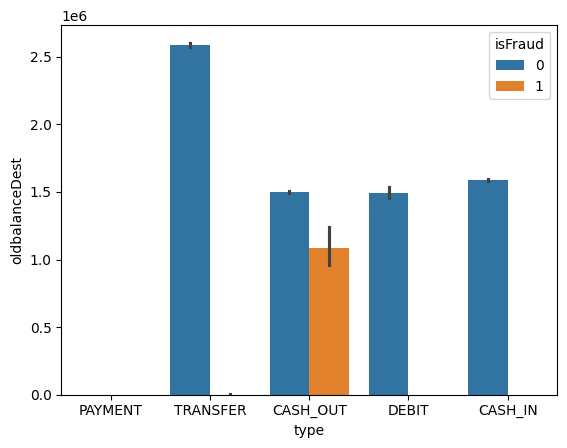

In [ ]:
sns.barplot(x='type', y ='oldbalanceDest',data = df, hue='isFraud')

<Axes: xlabel='type', ylabel='newbalanceDest'>

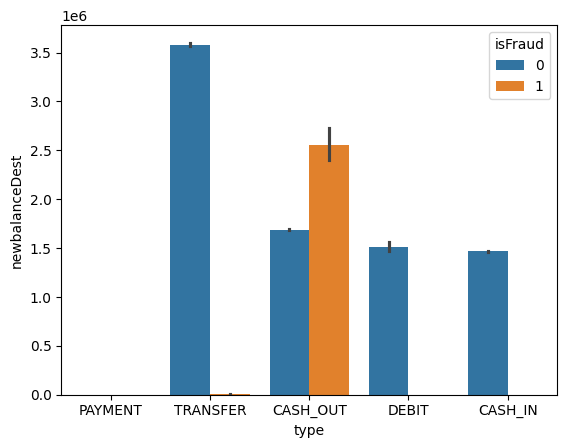

In [ ]:
sns.barplot(x='type', y ='newbalanceDest',data = df, hue='isFraud')


# One Hot Encoding the Categorical Variables:

In [16]:
x = df.drop(columns = ['isFraud'])
y = df['isFraud']

In [18]:
df[df['isFraud']==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [6]:
y

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64

In [7]:
from sklearn.preprocessing import OneHotEncoder


# Identify categorical columns
categorical_columns = x.select_dtypes(include=['object']).columns

# Create a OneHotEncoder instance with drop='first'
encoder = OneHotEncoder(drop='first')

# Apply one-hot encoding to the categorical columns
encoded_data = encoder.fit_transform(x[categorical_columns].astype(str))

# Convert the sparse matrix to a DataFrame with appropriate column names
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the new DataFrame with the original DataFrame
x_encoded = pd.concat([x, encoded_df], axis=1)

# Drop the original categorical columns
x_encoded = x_encoded.drop(categorical_columns, axis=1)

# Display the resulting DataFrame
x_encoded


,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.00,160296.36,0.00,0.00,0,0.0,0.0,1.0,0.0
1,1864.28,21249.00,19384.72,0.00,0.00,0,0.0,0.0,1.0,0.0
2,181.00,181.00,0.00,0.00,0.00,0,0.0,0.0,0.0,1.0
3,181.00,181.00,0.00,21182.00,0.00,0,1.0,0.0,0.0,0.0
4,11668.14,41554.00,29885.86,0.00,0.00,0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,0.00,339682.13,0,1.0,0.0,0.0,0.0
6362616,6311409.28,6311409.28,0.00,0.00,0.00,0,0.0,0.0,0.0,1.0
6362617,6311409.28,6311409.28,0.00,68488.84,6379898.11,0,1.0,0.0,0.0,0.0
6362618,850002.52,850002.52,0.00,0.00,0.00,0,0.0,0.0,0.0,1.0


# Train-Test Split:

In [8]:
#Train-Test Split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_encoded,y, test_size=0.25, random_state= 1)




# Logistic Regression Model:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588586
           1       0.32      0.78      0.46      2069

    accuracy                           1.00   1590655
   macro avg       0.66      0.89      0.73   1590655
weighted avg       1.00      1.00      1.00   1590655



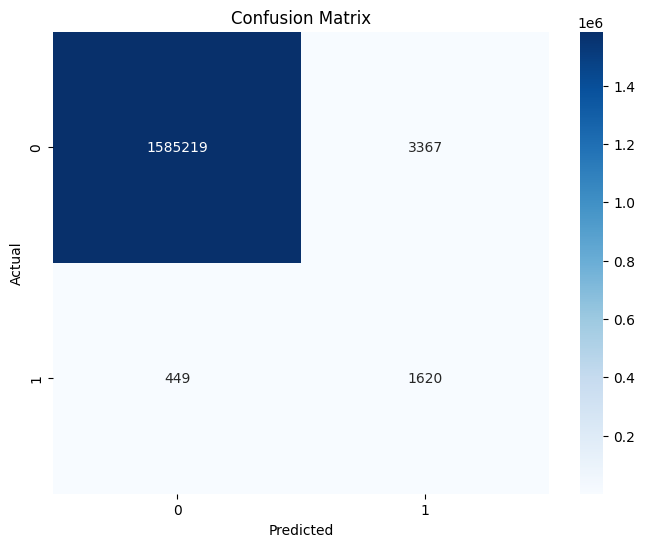

In [9]:
from sklearn.linear_model import LogisticRegression
LGR = LogisticRegression(random_state =0)
LGR.fit(x_train, y_train)

y_pred_LGR = LGR.predict(x_test)

# Predict and Evaluate New Result with test set
from sklearn.metrics import classification_report,confusion_matrix


print(classification_report(y_test, y_pred_LGR))

# Create a heatmap of Confusion Matrix

cm = confusion_matrix(y_test,y_pred_LGR)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



# Naive Bayes Model:

              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1588586
           1       0.03      0.16      0.05      2069

    accuracy                           0.99   1590655
   macro avg       0.51      0.58      0.52   1590655
weighted avg       1.00      0.99      0.99   1590655



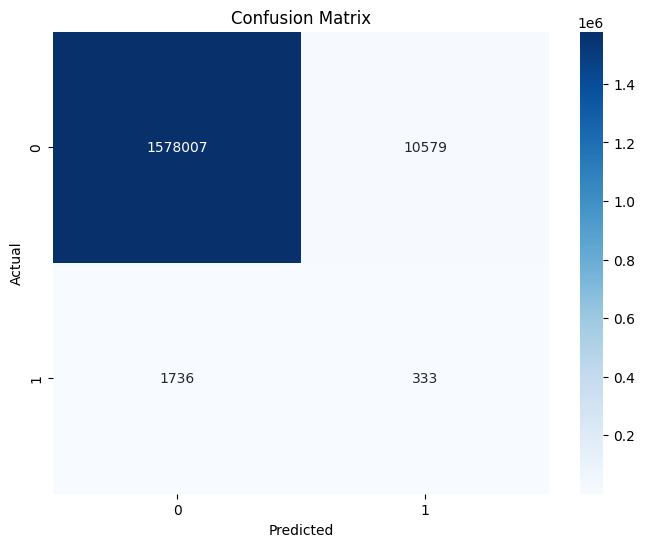

In [ ]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(x_train, y_train)

y_pred_NB = NB.predict(x_test)



# Predict and Evaluate New Result with test set
from sklearn.metrics import classification_report,confusion_matrix


print(classification_report(y_test, y_pred_NB))

# Create a heatmap of Confusion Matrix

cm = confusion_matrix(y_test,y_pred_NB)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



# XGBoost Classifier Model:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588586
           1       0.95      0.77      0.85      2069

    accuracy                           1.00   1590655
   macro avg       0.97      0.89      0.93   1590655
weighted avg       1.00      1.00      1.00   1590655



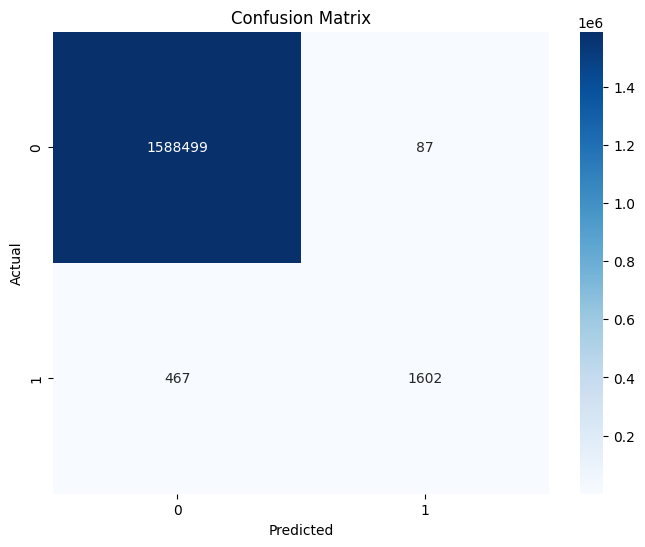

In [ ]:
# Implementing XGBoost on the training set

from xgboost import XGBClassifier
XGBC = XGBClassifier()
XGBC.fit(x_train, y_train)

# Predict New Result with test set

y_pred_XGBC = XGBC.predict(x_test)

# Predict and Evaluate New Result with test set
from sklearn.metrics import classification_report,confusion_matrix


print(classification_report(y_test, y_pred_XGBC))

# Create a heatmap of Confusion Matrix

cm = confusion_matrix(y_test,y_pred_XGBC)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



# AdaBoost Classifier:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588586
           1       0.84      0.51      0.63      2069

    accuracy                           1.00   1590655
   macro avg       0.92      0.75      0.82   1590655
weighted avg       1.00      1.00      1.00   1590655



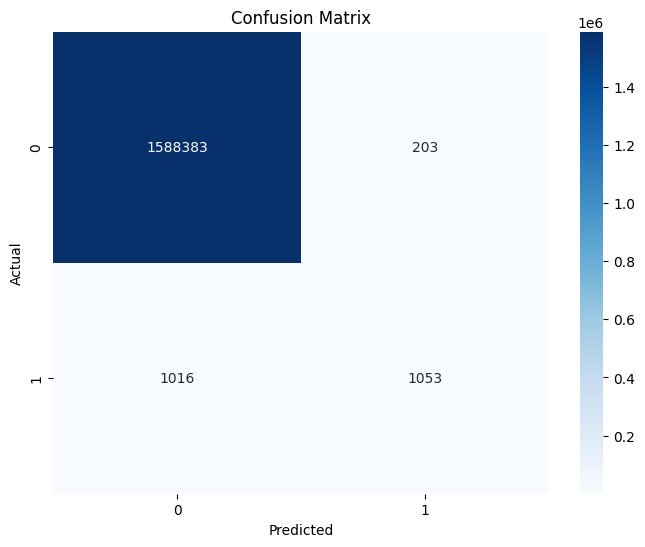

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize the AdaBoost Classifier
abc = AdaBoostClassifier()

# Train the model on the training set
abc.fit(x_train, y_train)

# Predict on the test set
y_pred_abc = abc.predict(x_test)

# Predict and Evaluate New Result with test set
from sklearn.metrics import classification_report,confusion_matrix


print(classification_report(y_test, y_pred_abc))

# Create a heatmap of Confusion Matrix

cm = confusion_matrix(y_test,y_pred_abc)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Stochastic Gradient Descent Classifier:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99   1588586
           1       0.07      0.67      0.12      2069

    accuracy                           0.99   1590655
   macro avg       0.53      0.83      0.56   1590655
weighted avg       1.00      0.99      0.99   1590655



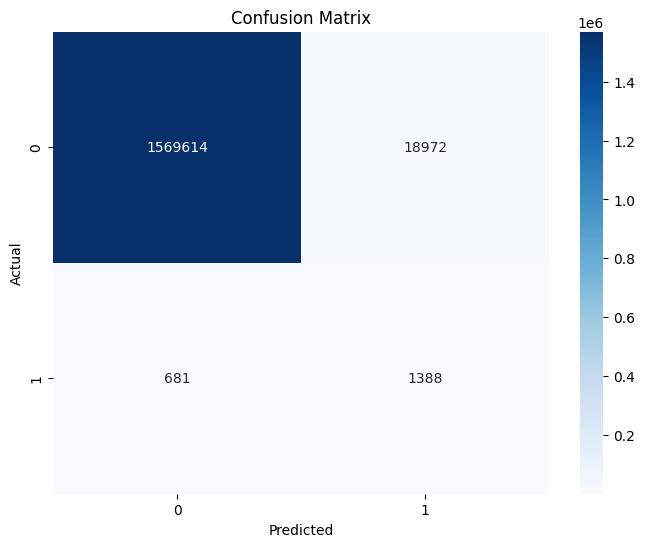

In [ ]:
from sklearn.linear_model import SGDClassifier

# Initialize the SGD Classifier
sgd = SGDClassifier()

# Train the model on the training set
sgd.fit(x_train, y_train)

# Predict on the test set
y_pred_sgd = sgd.predict(x_test)

# Predict and Evaluate New Result with test set
from sklearn.metrics import classification_report,confusion_matrix


print(classification_report(y_test, y_pred_sgd))

# Create a heatmap of Confusion Matrix

cm = confusion_matrix(y_test,y_pred_sgd)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# LightGBM Classifier:

[LightGBM] [Info] Number of positive: 6144, number of negative: 4765821
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.655041 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1285
[LightGBM] [Info] Number of data points in the train set: 4771965, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001288 -> initscore=-6.653749
[LightGBM] [Info] Start training from score -6.653749
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588586
           1       0.29      0.64      0.40      2069

    accuracy                           1.00   1590655
   macro avg       0.65      0.82      0.70   1590655
weighted avg       1.00      1.00      1.00   1590655



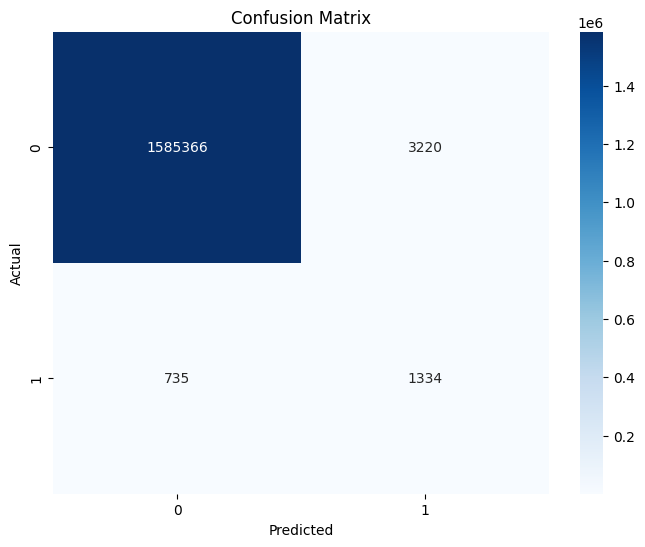

In [ ]:
from lightgbm import LGBMClassifier

# Initialize the LightGBM Classifier
lgbm = LGBMClassifier()

# Train the model on the training set
lgbm.fit(x_train, y_train)

# Predict on the test set
y_pred_lgbm = lgbm.predict(x_test)

# Predict and Evaluate New Result with test set
from sklearn.metrics import classification_report,confusion_matrix


print(classification_report(y_test, y_pred_lgbm))

# Create a heatmap of Confusion Matrix

cm = confusion_matrix(y_test,y_pred_lgbm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Final Model Selection:

We are going to prioritize the Recall Metric for evaluation. Because our main aim here, is to reduce type-2 error as much as possible to avoid critical financial loss due to fraudulent activities.
The Logistic Regression Model is the winner here for this dataset as it has the highest recall.

# Saving the Model:

In [10]:
import joblib
final_model_dict = {'Model':LGR ,
                    'Encoder': encoder
                    }
joblib.dump(final_model_dict, 'Financial_Fraud_Detector_Model.joblib')

['Financial_Fraud_Detector_Model.joblib']

# Loading The Model:

In [1]:
import joblib
model = joblib.load('Financial_Fraud_Detector_Model.joblib')

In [2]:
selected_model = model['Model']
selected_model

LogisticRegression(random_state=0)

In [3]:
encoder = model['Encoder']
encoder

OneHotEncoder(drop='first')

# Unseen Data Input:

We'll use some random data to see if the model works or not.

In [19]:
# Input your Data Here in the dictionary:
import pandas as pd

new_input = {
  'type':"TRANSFER",
 'amount': 181.00 ,
 'oldbalanceOrg': 181.00,
 'newbalanceOrig': 0.0,
 'oldbalanceDest': 0.00,
  'newbalanceDest': 0.00,
  'isFlaggedFraud': 0
}


input_df = pd.DataFrame([new_input])
input_df

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,TRANSFER,181.0,181.0,0.0,0.0,0.0,0


In [20]:

# One - Hot Encoding The Unseen Input Data

# Identify categorical columns
categorical_columns = input_df.select_dtypes(include=['object']).columns

# Apply one-hot encoding to the categorical columns
encoded_data = encoder.transform(input_df[categorical_columns].astype(str))


# Convert the sparse matrix to a DataFrame with appropriate column names
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the new DataFrame with the original DataFrame
input_encoded = pd.concat([input_df, encoded_df], axis=1)

# Drop the original categorical columns
input_encoded = input_encoded.drop(categorical_columns, axis=1)

# Display the resulting DataFrame
input_encoded


,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,181.0,181.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0


In [25]:
# Final Prediction:

pred = selected_model.predict(input_encoded)

if pred==1:
  print('Fraud')
else:
  print('Not Fraud')

Fraud
